In [1]:
import pandas as pd
import numpy as np
# importing the libraries 


# libraries for data wrangling and numerical computation
import pandas as pd
import numpy as np 
import math


# libraries for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# libraries for machine learning modelling
from sklearn.linear_model import LogisticRegression


# libraries for model evaluation
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\New folder\Python Data Class\unstructured\data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# check null vaues and datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# changing ID datatype to string

data['id'] = data.astype({'id':'str'}).dtypes

In [6]:
data.isnull().sum()

id                         569
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
dtype: i

In [7]:
data.drop(['id'], axis= 1, inplace= True)
data.reset_index(inplace= True)

In [8]:
data['id'] = data['index']
data.drop(columns= ['index'], inplace= True)
data['id'] = [x+1 for x in data['id']]

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,id
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,3
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,4
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,5


In [10]:
data['diagnosis'] = ['cancer' if x == 'M' else 'No cancer' for x in data.diagnosis]

In [11]:
px.histogram(data_frame= data, x = 'diagnosis',
             title = 'NO OF CANCEROUS AND NON CANCEOUS DIAGNOSIS',
             color= 'diagnosis')

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\4003811460.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

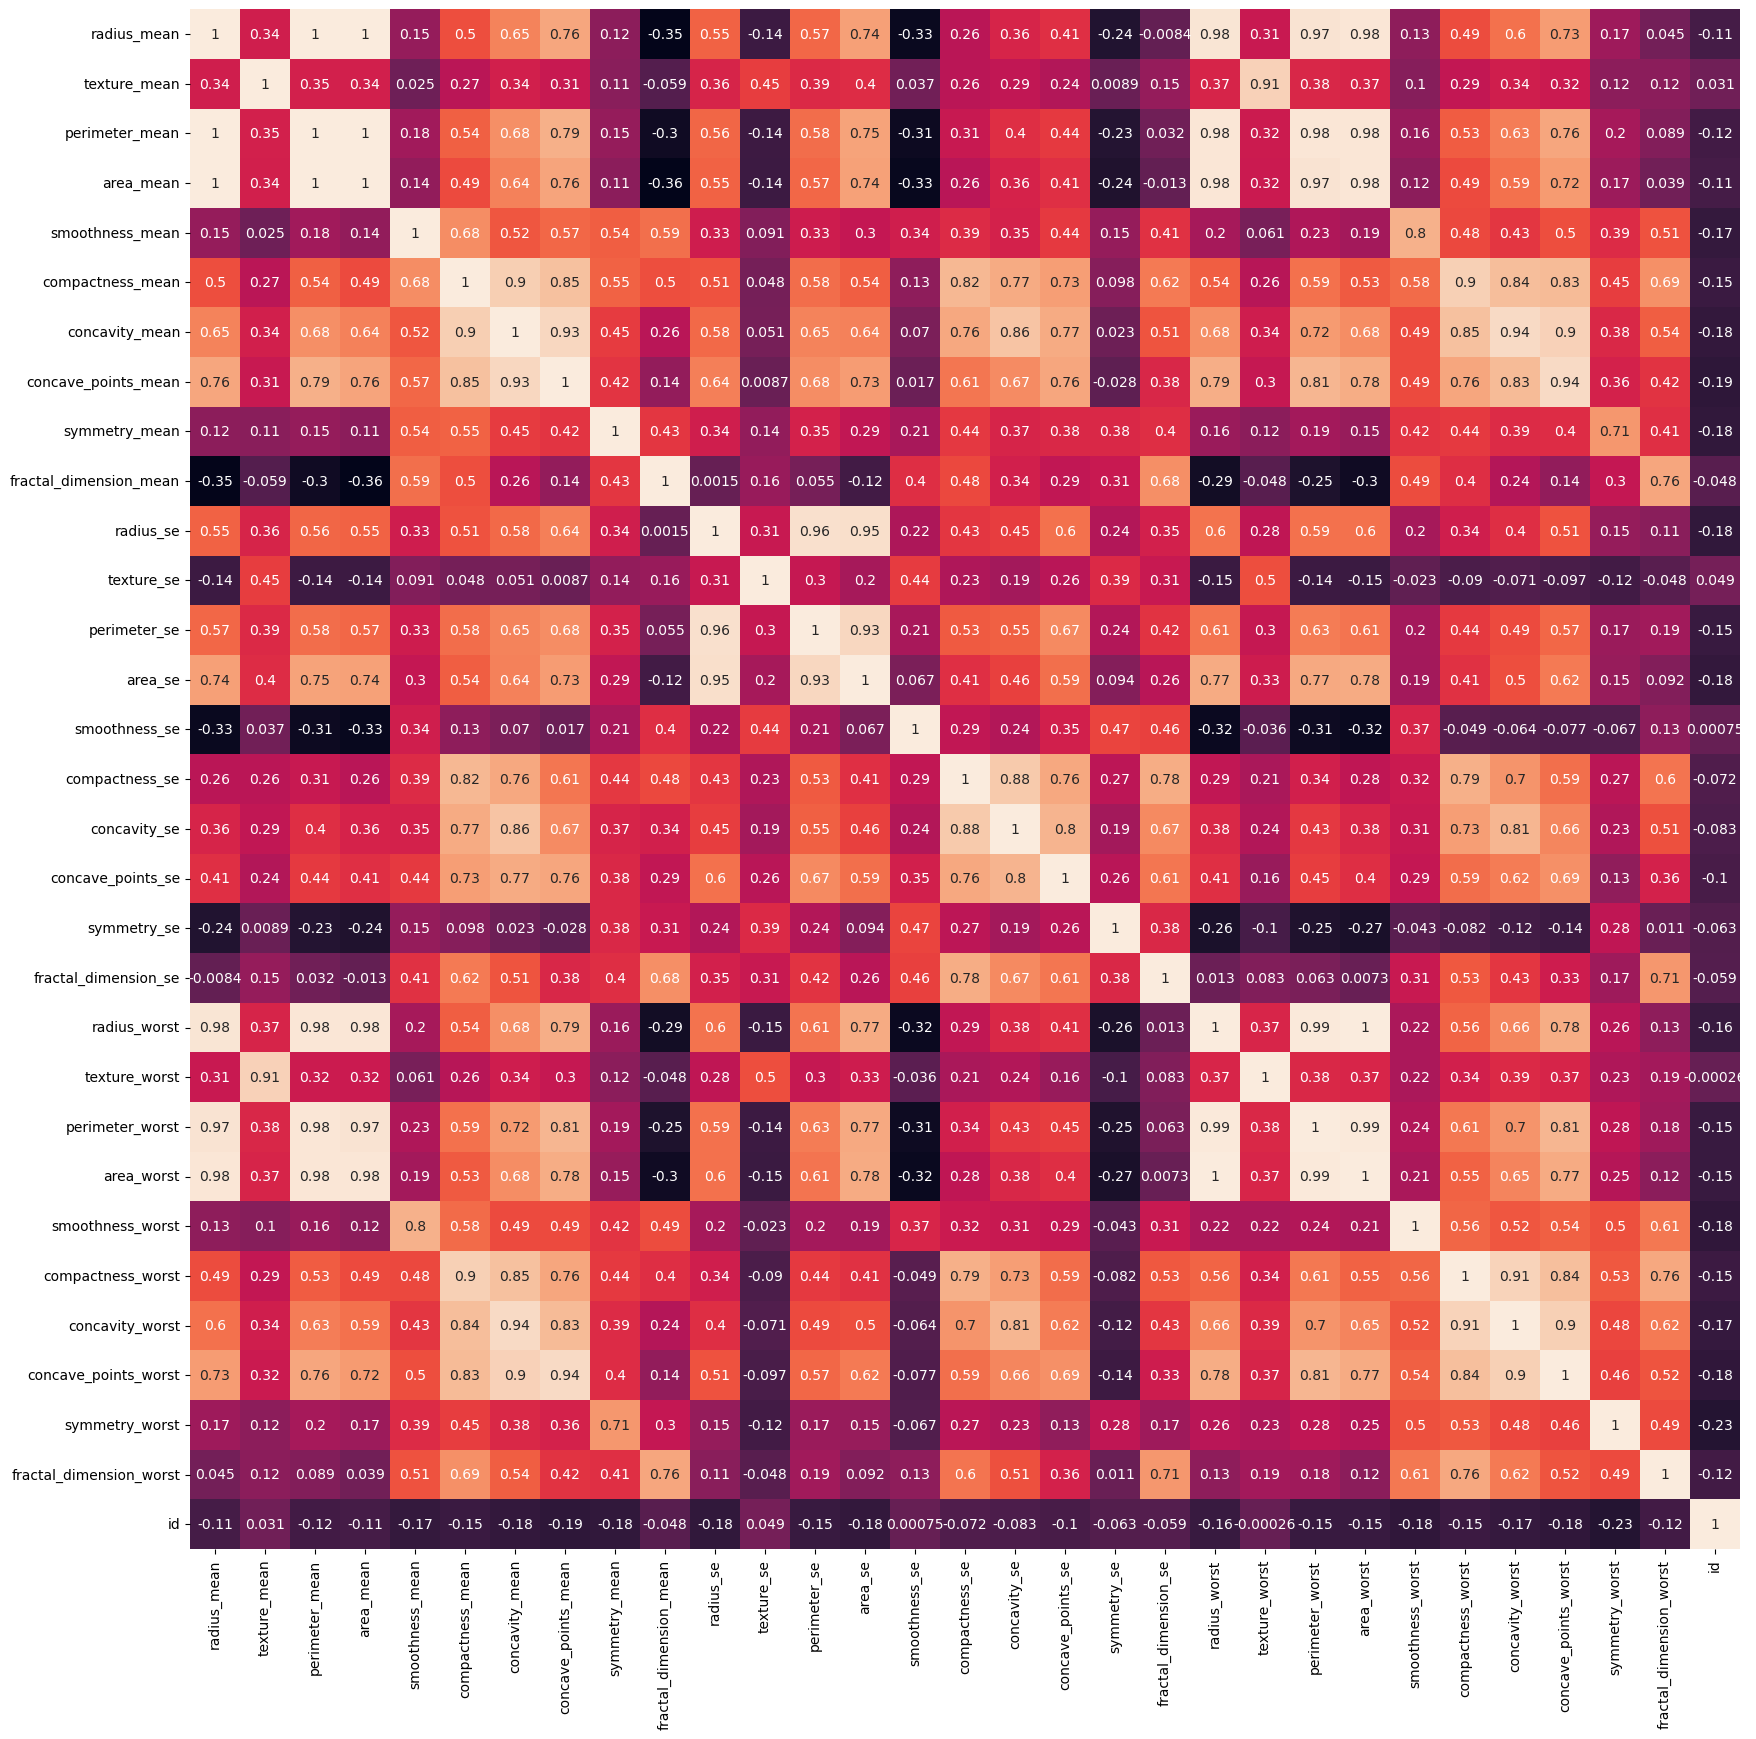

In [12]:
corr_data = data.corr(method= 'spearman')

plt.figure(figsize= (20,20))
sns.heatmap(corr_data, annot= True, cbar= False)

In [13]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

y = encoder.fit_transform(data['diagnosis'])

In [14]:
x = data.drop(['id','diagnosis'], axis= 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [16]:
lr = LogisticRegression()

model = lr.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [17]:
print(accuracy_score(y_true=y_test, y_pred=test_pred))
print(accuracy_score(y_true=y_train, y_pred=train_pred))

0.9649122807017544
0.989010989010989


Text(50.722222222222214, 0.5, 'Predicted Outcome')

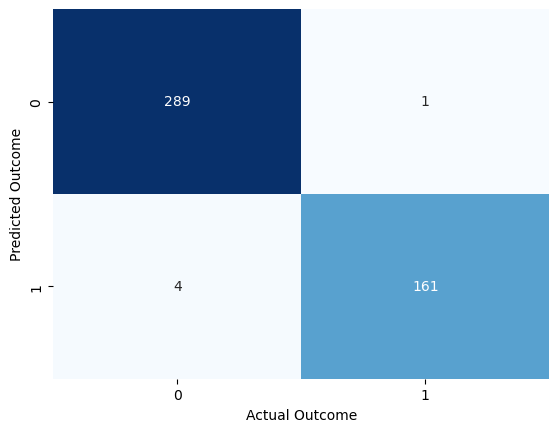

In [18]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=y_train, y_pred=train_pred)

sns.heatmap(confusion, annot= True, cmap= 'Blues', fmt = '0.0f', cbar= False)

plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

Text(95.72222222222221, 0.5, 'Predicted Outcome')

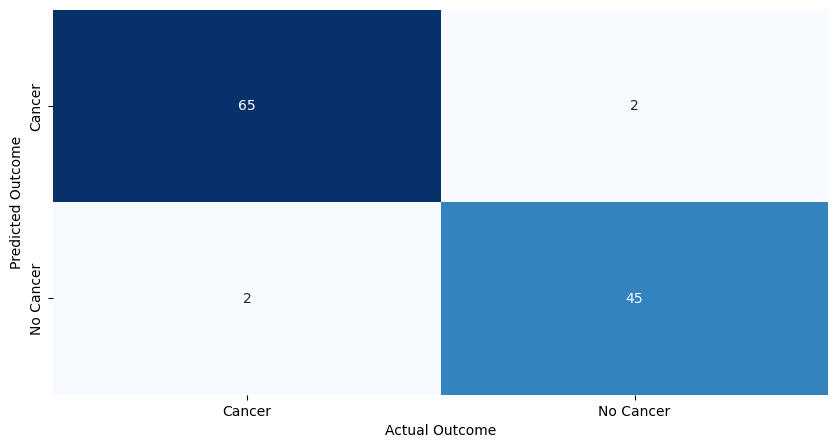

In [19]:
confusion_2 = confusion_matrix(y_test, test_pred)
confusion_df = pd.DataFrame(data = confusion_2, columns= ['Cancer', 'No Cancer'],
                            index = ['Cancer', 'No Cancer'])


plt.figure(figsize= (10,5))
sns.heatmap(confusion_df, annot = True, cmap = 'Blues', cbar = False)


plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

In [20]:
confusion_2

array([[65,  2],
       [ 2, 45]], dtype=int64)

In [21]:
confusion_df

,Cancer,No Cancer
Cancer,65,2
No Cancer,2,45


In [22]:
# precision, recall, F1 score

def precision_recall(confusion):
    precision = confusion[0][0]/confusion[0].sum()
    recall = confusion[0][0]/(confusion[0][0] + confusion_2[1][0])
    f1_score = 2 * (precision * recall)/ (precision + recall)
    
    return precision, recall, f1_score

In [23]:
precision, recall, f1_score = precision_recall(confusion = confusion_2)

print(precision)
print(recall)
print(f1_score)

0.9701492537313433
0.9701492537313433
0.9701492537313433


In [24]:
precision_train, recall_train, f1_score_train = precision_recall(confusion=confusion)

print(precision_train)
print(recall_train)
print(f1_score_train)

0.996551724137931
0.993127147766323
0.9948364888123924


In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print(precision_score(y_train, train_pred))
print(recall_score(y_train, train_pred))
print(f1_score(y_train, train_pred))

0.9938271604938271
0.9757575757575757
0.9847094801223242


### Second Example -- Weather Data Classification

In [26]:
weather_df = pd.read_csv('weatherAUS.csv')

In [27]:
weather_df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [28]:
weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [29]:
# inspect null values
weather_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [30]:
# get the descriptive statistics

weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [31]:
# handle numeric missing values
columns = list(weather_df.describe().columns)

for col in columns:
    weather_df[col].fillna(value=weather_df[col].median(), inplace= True)



In [32]:
# handled categorical missing values

cat_cols = ['WindGustDir','RainToday', 'RainTomorrow','WindDir9am', 'WindDir3pm']

for col in cat_cols:
    weather_df[col].fillna(value=weather_df[col].mode().values[0], inplace= True)

In [33]:
# encoding the categorical columns 
cat_cols = ['WindGustDir','WindDir9am', 'WindDir3pm']

weather_df = pd.get_dummies(data= weather_df,columns= cat_cols)

weather_df['RainToday'] = [1 if x.lower()== 'yes' else 0 for x in weather_df['RainToday']]

In [34]:
train = weather_df[weather_df['Date'] < '2016-01-01']
test =  weather_df[weather_df['Date'] >= '2016-01-01']


X_train = train.drop(columns=['Date','RainTomorrow'])
X_test = test.drop(columns=['Date','RainTomorrow'])
y_train = train['RainTomorrow']
y_test = test['RainTomorrow']
# y_train = encoder.fit_transform(train['RainTomorrow'])
# y_test = encoder.fit_transform(test['RainTomorrow'])


In [42]:
train.to_csv('weather_train.csv')
test.to_csv('weather_test.csv')

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def scale(x):
    numeric_cols = list(x.describe().columns)
    scaler.fit(x[numeric_cols])
    scaled_num = scaler.transform(x[numeric_cols])
    return scaled_num

In [36]:
X_train = scale(X_train)
X_test = scale(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state= 0)

In [38]:
w_model = logreg.fit(X_train, y_train)

test_predw = w_model.predict(X_test)
train_predw = w_model.predict(X_train)

In [39]:
print(accuracy_score(y_true=y_test, y_pred=test_predw))
print(accuracy_score(y_true=y_train, y_pred=train_predw))

0.8373310238355236
0.8457986762318865


Text(95.72222222222221, 0.5, 'Predicted Outcome')

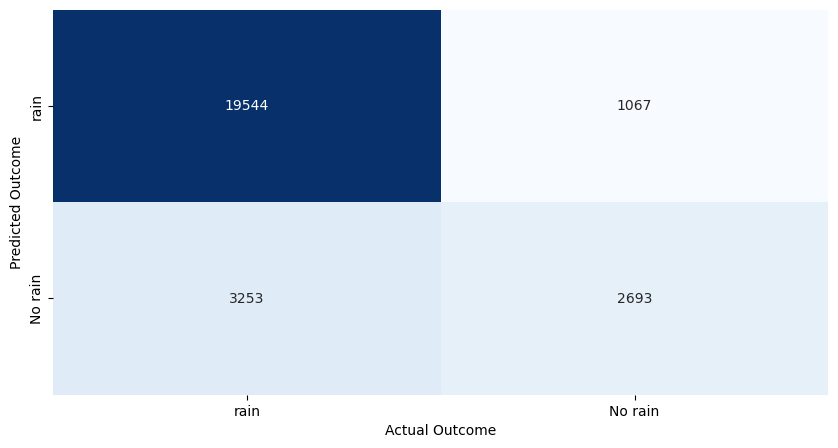

In [40]:
confusion_weather = confusion_matrix(y_test, test_predw)
confusion_df = pd.DataFrame(data = confusion_weather, columns= ['rain', 'No rain'],
                            index = ['rain', 'No rain'])


plt.figure(figsize= (10,5))
sns.heatmap(confusion_df, annot = True, cmap = 'Blues', cbar = False, fmt='0.0f')


plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

In [41]:
print(precision_score(y_true=y_test, y_pred=test_predw, pos_label='No'))
print(recall_score(y_true=y_test, y_pred=test_predw, pos_label= 'No'))

0.8573057858490152
0.9482315268545922


### CLASSIFICATION WITH LOGISTIIC REGRESSION

In [1]:
# data wrangling
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

# datasets 
from sklearn import datasets


In [2]:
# load the dataset

X = datasets.load_breast_cancer(as_frame= True)['data']
y = datasets.load_breast_cancer()['target']

In [3]:
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


<Axes: >

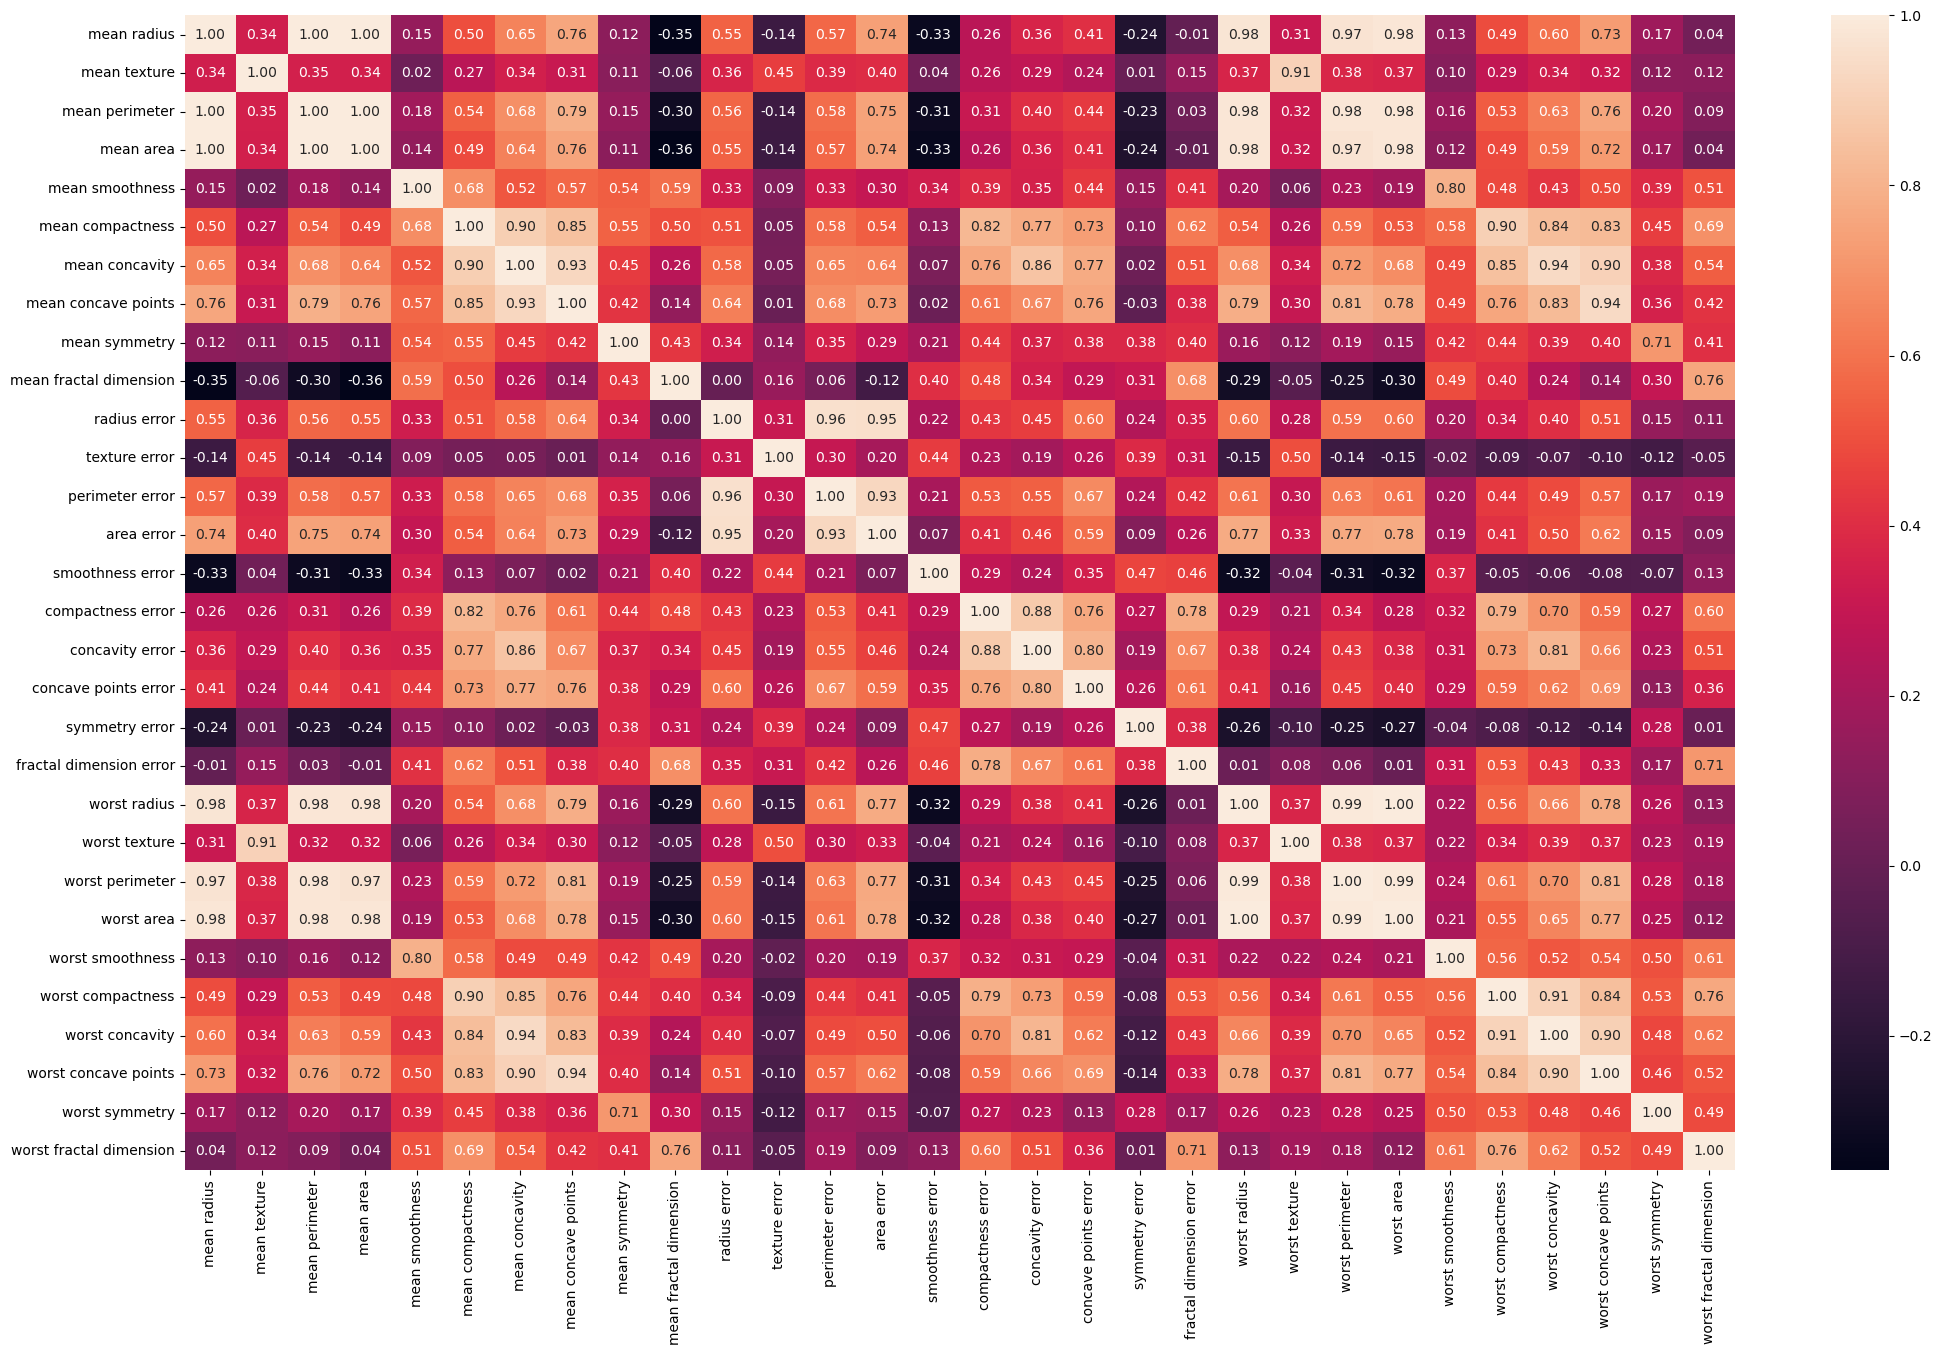

In [4]:
corr_df = X.corr(method='spearman')

fig = plt.figure(figsize=(25,15))

sns.heatmap(corr_df, annot= True, fmt= '0.02f')

In [5]:
# scale the data in the X axis 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data= X_scaled, columns= X.columns)

In [6]:
# model building and evaluation

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify= y,
                                                    random_state= 23)

# build the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions
preds = model.predict(X_test)

# evaluate the model performance
score = accuracy_score(y_test, preds)
print(f'Accuracy score: {score}')

Accuracy score: 0.9824561403508771


### Proper Evaluation

Text(0.5, 1.0, 'CONFUSION MATRIX OF BREAST CANCER CLASSIFICATION')

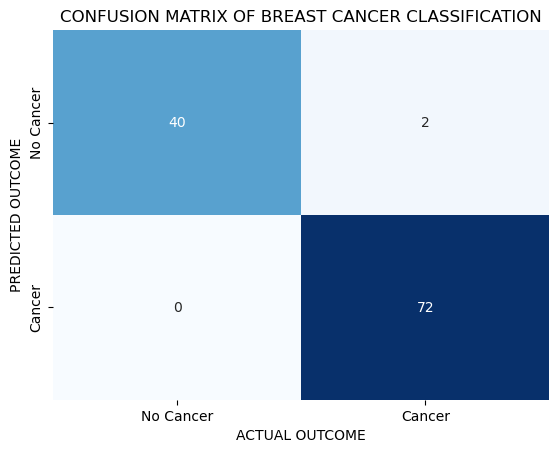

In [7]:
# confusion matrix 

conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

conf_df = pd.DataFrame(data=conf_matrix, index= ['No Cancer', 'Cancer'],
                       columns = ['No Cancer', 'Cancer'])

sns.heatmap(data=conf_df, annot=True, cbar=False, cmap='Blues')

plt.xlabel('ACTUAL OUTCOME')
plt.ylabel('PREDICTED OUTCOME')

plt.title('CONFUSION MATRIX OF BREAST CANCER CLASSIFICATION')

In [8]:
# classification report 

report = classification_report(y_true=y_test, y_pred= preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [9]:
recall_score(y_true=y_test, y_pred=preds)

1.0

In [13]:
# train a batch of models based on different random state
import random

count = 0
while True:
    seed = random.choices(list(range(0,100)))[0]
    if count <= 30:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state= seed)
        model = LogisticRegression(random_state=seed)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        print("==========================+=====================================")
        print(f'Seed = {seed}, f1 = {f1_score(y_test, preds)}, precision = {precision_score(y_test, preds)}')
        count +=1
    else:
        break
        

==========================+=====================================
Seed = 55, f1 = 0.9763779527559054, precision = 1.0
==========================+=====================================
Seed = 6, f1 = 0.983050847457627, precision = 0.9666666666666667
==========================+=====================================
Seed = 64, f1 = 0.9803921568627451, precision = 0.974025974025974
==========================+=====================================
Seed = 81, f1 = 0.9571428571428571, precision = 0.9178082191780822
==========================+=====================================
Seed = 53, f1 = 1.0, precision = 1.0
==========================+=====================================
Seed = 5, f1 = 0.9774436090225564, precision = 0.9701492537313433
==========================+=====================================
Seed = 2, f1 = 0.9781021897810219, precision = 0.9852941176470589
==========================+=====================================
Seed = 64, f1 = 0.9803921568627451, precision = 0.97402597402

In [ ]:

while 